In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier as rfc

In [171]:
trainsub = pd.read_csv('train_submissions.csv')
userdata = pd.read_csv('user_data.csv')
problemdata = pd.read_csv('problem_data.csv')
ts_ = trainsub
ud_ = userdata
pd_ = problemdata

In [172]:
print(ts_.info())
print(ud_.info())
print(pd_.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155295 entries, 0 to 155294
Data columns (total 3 columns):
user_id           155295 non-null object
problem_id        155295 non-null object
attempts_range    155295 non-null int64
dtypes: int64(1), object(2)
memory usage: 3.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 11 columns):
user_id                      3571 non-null object
submission_count             3571 non-null int64
problem_solved               3571 non-null int64
contribution                 3571 non-null int64
country                      2418 non-null object
follower_count               3571 non-null int64
last_online_time_seconds     3571 non-null int64
max_rating                   3571 non-null float64
rating                       3571 non-null float64
rank                         3571 non-null object
registration_time_seconds    3571 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 307.0+

In [173]:
ts_= pd.merge(ts_,ud_,on="user_id")
ts_ = pd.merge(ts_,pd_,on='problem_id')
print(ts_.info())
print(ts_.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155295 entries, 0 to 155294
Data columns (total 16 columns):
user_id                      155295 non-null object
problem_id                   155295 non-null object
attempts_range               155295 non-null int64
submission_count             155295 non-null int64
problem_solved               155295 non-null int64
contribution                 155295 non-null int64
country                      117442 non-null object
follower_count               155295 non-null int64
last_online_time_seconds     155295 non-null int64
max_rating                   155295 non-null float64
rating                       155295 non-null float64
rank                         155295 non-null object
registration_time_seconds    155295 non-null int64
level_type                   154675 non-null object
points                       126220 non-null float64
tags                         139868 non-null object
dtypes: float64(3), int64(7), object(6)
memory usage: 20.1+ M

In [174]:
def existence(x):
    reg = x['registration_time_seconds']
    last = x['last_online_time_seconds']
    return last-reg
ts_['existence_time'] = ts_[['registration_time_seconds','last_online_time_seconds']].apply(existence,axis=1)

In [183]:
#ts_['country'] = pd.DataFrame(ts_['country']).fillna(ts_.country.mode()[0],axis=1)
ts_['level_type']  = pd.DataFrame(ts_['level_type']).fillna(ts_.level_type.mode()[0],axis=1)
ts_['points'] = pd.DataFrame(ts_['points']).fillna(ts_.points.mean(),axis=1)


In [185]:
#handling missing values
ts_.drop(['country','tags'],inplace=True,axis=1)
#ts_.dropna(inplace=True)
ts_.isna().any()

user_id                      False
problem_id                   False
attempts_range               False
submission_count             False
problem_solved               False
contribution                 False
follower_count               False
last_online_time_seconds     False
max_rating                   False
rating                       False
rank                         False
registration_time_seconds    False
level_type                   False
points                       False
existence_time               False
dtype: bool

In [6]:
print(ts_.info())
print(ts_.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126014 entries, 0 to 155294
Data columns (total 11 columns):
user_id             126014 non-null object
problem_id          126014 non-null object
attempts_range      126014 non-null int64
submission_count    126014 non-null int64
problem_solved      126014 non-null int64
contribution        126014 non-null int64
follower_count      126014 non-null int64
rating              126014 non-null float64
rank                126014 non-null object
level_type          126014 non-null object
points              126014 non-null float64
dtypes: float64(2), int64(5), object(4)
memory usage: 11.5+ MB
None
     user_id problem_id  attempts_range  submission_count  problem_solved  \
0   user_232  prob_6507               1                53              47   
1  user_1910  prob_6507               2               240             218   
2  user_1824  prob_6507               2               370             336   
3   user_895  prob_6507               1    

In [7]:
%matplotlib inline
#ts_[['submission_count','problem_solved','attempts_range']]

In [14]:
num_attempts = ts_['submission_count']/(ts_['submission_count']-ts_['problem_solved'])

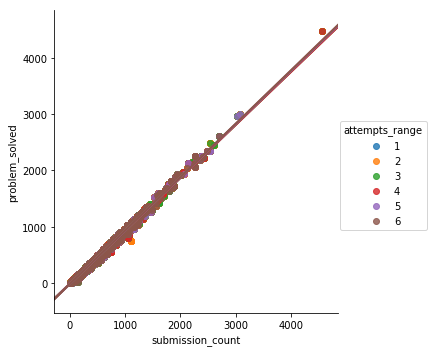

In [18]:
sns.lmplot('submission_count','problem_solved',data=ts_,hue='attempts_range')

In [377]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test  = train_test_split(ts_.iloc[:,3:],ts_['attempts_range'],test_size=0.2,random_state = 135)

In [142]:
from sklearn.model_selection import train_test_split

X_train1,X_test1,y_train1,y_test1  = train_test_split(ts_.iloc[:,3:],ts_['attempts_range'],test_size=0.2,random_state = 25)

In [378]:
def problems(x):
    count = x['submission_count']
    sol = x['problem_solved']
    return count-sol

X_train['subsolve'] = X_train.apply(problems,axis=1)
X_test['subsolve'] = X_test.apply(problems,axis = 1)

In [379]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124236 entries, 10325 to 55967
Data columns (total 13 columns):
submission_count             124236 non-null int64
problem_solved               124236 non-null int64
contribution                 124236 non-null int64
follower_count               124236 non-null int64
last_online_time_seconds     124236 non-null int64
max_rating                   124236 non-null float64
rating                       124236 non-null float64
rank                         124236 non-null object
registration_time_seconds    124236 non-null int64
level_type                   124236 non-null object
points                       124236 non-null float64
existence_time               124236 non-null int64
subsolve                     124236 non-null int64
dtypes: float64(3), int64(8), object(2)
memory usage: 13.3+ MB


In [380]:
test_data = pd.read_csv('test_submissions.csv')
test = test_data
test = test.merge(pd_,on='problem_id')
test = test.merge(ud_,on='user_id')
test['existence_time'] = test.apply(existence,axis=1)
test['points']=pd.DataFrame(test['points']).fillna(test.points.mean(),axis=1)
test['level_type'] = pd.DataFrame(test['level_type']).fillna(test.level_type.mode()[0],axis=1)
test['subsolve'] = test.apply(problems,axis=1)

In [381]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X_train['level_type'] = le.fit_transform(X_train['level_type'])
X_test['level_type'] = le.transform(X_test['level_type'])
test['level_type'] = le.transform(test['level_type'])



X_train['rank'] = le.fit_transform(X_train['rank'])
X_test['rank'] = le.transform(X_test['rank'])
test['rank'] = le.transform(test['rank'])

X_train.drop(['last_online_time_seconds','submission_count'],axis=1,inplace=True)
X_test.drop(['last_online_time_seconds','submission_count'],axis=1,inplace=True)

In [372]:
from sklearn.preprocessing import MinMaxScaler as MM
mm = MM()

X_train = mm.fit_transform(X_train.iloc[:,X_train.columns!='existence_time'])
X_test = mm.transform(X_test.iloc[:,X_test.columns!='existence_time'])
modtest = mm.transform(test[['submission_count', 'problem_solved', 'contribution', 'follower_count',
       'last_online_time_seconds', 'max_rating', 'rating', 'rank',
       'registration_time_seconds', 'level_type', 'points']])


In [375]:
from xgboost import XGBClassifier as XGB

xgb = XGB(min_child_weight = 3, n_estimators = 300,learning_rate = 0.8).fit(X_train,y_train)

In [349]:
kk = xgb.predict(test[['submission_count', 'problem_solved', 'contribution', 'follower_count',
       'last_online_time_seconds', 'max_rating', 'rating', 'rank',
       'registration_time_seconds', 'level_type', 'points']])

C:\Users\Teju\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [376]:
f1_score(y_test,xgb.predict(X_test),average ='weighted')

C:\Users\Teju\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.43452333501321555

In [144]:
#one hot encoding
dummies_level_train = pd.get_dummies(X_train1['level_type'])
dummies_level_test = pd.get_dummies(X_test1['level_type'])

dummies_rank_train = pd.get_dummies(X_train1['rank'])
dummies_rank_test = pd.get_dummies(X_test1['rank'])

X_train1 = pd.concat([X_train1,dummies_level_train,dummies_rank_train],axis=1)
X_test1 = pd.concat([X_test1,dummies_level_test,dummies_rank_test],axis=1)

X_train1.drop(['rank','level_type'],axis=1,inplace=True)
X_test1.drop(['rank','level_type'],axis=1,inplace=True)

In [167]:
from sklearn.preprocessing import MinMaxScaler as MM
mm = MM()
X_train1[['submission_count', 'problem_solved', 'contribution', 'follower_count',
       'max_rating', 'rating', 'points', 'existence_time', 'A', 'B', 'C', 'D',
       'E', 'F', 'G', 'H', 'advanced', 'beginner', 'expert', 'intermediate']] = mm.fit_transform(X_train1[['submission_count', 'problem_solved', 'contribution', 'follower_count',
       'max_rating', 'rating', 'points', 'existence_time', 'A', 'B', 'C', 'D',
       'E', 'F', 'G', 'H', 'advanced', 'beginner', 'expert', 'intermediate']])
test[['submission_count', 'problem_solved', 'contribution', 'follower_count',
       'max_rating', 'rating', 'points', 'existence_time', 'A', 'B', 'C', 'D',
       'E', 'F', 'G', 'H', 'advanced', 'beginner', 'expert', 'intermediate']] = mm.transform(test[['submission_count', 'problem_solved', 'contribution', 'follower_count',
       'max_rating', 'rating', 'points', 'existence_time', 'A', 'B', 'C', 'D',
       'E', 'F', 'G', 'H', 'advanced', 'beginner', 'expert', 'intermediate']])



In [301]:
X_train.columns

Index(['submission_count', 'problem_solved', 'contribution', 'follower_count',
       'last_online_time_seconds', 'max_rating', 'rating', 'rank',
       'registration_time_seconds', 'level_type', 'points', 'existence_time'],
      dtype='object')

In [382]:
rf25 = rfc().fit(X_train,y_train)

In [389]:
from sklearn.model_selection import GridSearchCV


gridrf  = GridSearchCV(rfc(),{'min_samples_split' :[3,4,5] ,'n_estimators' :[100,200,300]},n_jobs=-1)
gridrf.fit(X_train,y_train)

#gridc = GridSearchCV(rfc(), {'n_estimators':[10,20,30],'max_depth':[3,5,7]},n_jobs=1)
#gridc.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 4, 5], 'n_estimators': [100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [390]:
from sklearn.metrics import confusion_matrix as cm,accuracy_score as acs,f1_score
ypred2 = gridrf.predict(X_test)
f1_score(y_test,ypred2,average = 'weighted')


0.445552734916021

In [393]:
gridrf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [391]:
krfc = rf25.predict(test[['problem_solved', 'contribution', 'follower_count', 'max_rating',
       'rating', 'rank', 'registration_time_seconds', 'level_type', 'points',
       'existence_time', 'subsolve']])

In [313]:
test.isna().any()

ID                           False
user_id                      False
problem_id                   False
level_type                   False
points                       False
tags                          True
submission_count             False
problem_solved               False
contribution                 False
country                       True
follower_count               False
last_online_time_seconds     False
max_rating                   False
rating                       False
rank                         False
registration_time_seconds    False
existence_time               False
dtype: bool

In [218]:
test['level_type'].isna().value_counts()

False    66555
Name: level_type, dtype: int64

In [162]:
test = pd.concat([test,pd.get_dummies(test['level_type']),pd.get_dummies(test['rank'])],axis=1)

In [227]:

#check above for knowing how to get test's rank and level type label encoded
#test.drop(['level_type','rank'],axis=1,inplace=True)

In [106]:
pd.DataFrame(rf15.predict(test[['submission_count', 'problem_solved', 'contribution', 'follower_count',
       'rating', 'points', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'advanced',
       'beginner', 'expert', 'intermediate']])).iloc[:,0].value_counts()

1    63297
2     3250
3        7
4        1
Name: 0, dtype: int64

In [107]:
test[['submission_count', 'problem_solved', 'contribution', 'follower_count',
       'rating', 'points', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'advanced',
       'beginner', 'expert', 'intermediate']] = mm.transform(test[['submission_count', 'problem_solved', 'contribution', 'follower_count',
       'rating', 'points', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'advanced',
       'beginner', 'expert', 'intermediate']])

In [108]:
mlp.predict(test[['submission_count', 'problem_solved', 'contribution', 'follower_count',
       'rating', 'points', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'advanced',
       'beginner', 'expert', 'intermediate']])

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [109]:
pd.DataFrame(mlp.predict(test[['submission_count', 'problem_solved', 'contribution', 'follower_count',
       'rating', 'points', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'advanced',
       'beginner', 'expert', 'intermediate']])).iloc[:,0].value_counts()

1    64168
2     2387
Name: 0, dtype: int64

In [113]:
samplesub = pd.read_csv('sample_submission.csv')

In [169]:
samplesub['ID'] = test_data['ID']
samplesub['attempts_range'] = rf100.predict(test[['submission_count', 'problem_solved', 'contribution', 'follower_count',
       'max_rating', 'rating', 'points', 'existence_time', 'A', 'B', 'C', 'D',
       'E', 'F', 'G', 'H', 'advanced', 'beginner', 'expert', 'intermediate']])

In [170]:
samplesub.to_csv('mysub2.csv',index=False)

In [221]:
X_test.columns

Index(['submission_count', 'problem_solved', 'contribution', 'follower_count',
       'max_rating', 'rating', 'rank', 'registration_time_seconds',
       'level_type', 'points', 'existence_time'],
      dtype='object')

In [394]:
newsb = pd.DataFrame({'ID': samplesub['ID'],'attempts_range': krfc})

In [395]:
newsb.to_csv('newna.csv',index = False)

In [133]:
newsb

,ID,attempts_range
0,user_856_prob_5822,1
1,user_2642_prob_2334,1
2,user_2557_prob_2920,1
3,user_1572_prob_4598,1
4,user_295_prob_6139,1
5,user_1202_prob_6253,1
6,user_1017_prob_2630,1
7,user_2907_prob_6360,1
8,user_3473_prob_4350,1
9,user_401_prob_1966,1


In [134]:
samplesub['attempts_range'].value_counts()

1    62694
2     3861
Name: attempts_range, dtype: int64